<a href="https://colab.research.google.com/github/quarcs-lab/pysalnarsc19/blob/master/content/410_dynamic_lisas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Directional Analysis of Dynamic LISAs

This notebook demonstrates how to use Rose Diagrams to visualize and carry out inference on directional LISAs.

# Setup

## Install libraries

In [2]:
!pip install -q seaborn
!pip install -q geopandas
!pip install -q shapely
!pip install -q libpysal
!pip install -q mapclassify
!pip install -q splot
!pip install -q legendgram
!pip install -q esda
!pip install -q inequality
!pip install -q giddy

     |████████████████████████████████| 931kB 2.7MB/s 
     |████████████████████████████████| 14.7MB 305kB/s 
     |████████████████████████████████| 10.4MB 55.7MB/s 
     |████████████████████████████████| 2.4MB 2.8MB/s 
     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 71kB 3.7MB/s 
     |████████████████████████████████| 266kB 8.6MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 235kB 55.9MB/s 


## Load libraries

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely
import mapclassify
import legendgram
import splot
from splot.mapping import vba_choropleth
from splot._viz_utils import shift_colormap
import libpysal 
from libpysal import examples
from libpysal import io
from libpysal.weights import Queen, Rook, KNN, Kernel
import giddy
from giddy.markov import Markov
from giddy.directional import Rose


## Load data from Github 

In [4]:
# It will be cloned for about a 12 hours. That is, you have to re-run this code only after 12 hours
 !git clone --recursive https://github.com/quarcs-lab/pysalnarsc19.git

Cloning into 'pysalnarsc19'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 434 (delta 52), reused 32 (delta 14), pack-reused 318
Receiving objects: 100% (434/434), 76.19 MiB | 13.11 MiB/s, done.
Resolving deltas: 100% (177/177), done.
Checking out files: 100% (163/163), done.


In [5]:
# Let us see what we have inside content/data Folder
 !ls pysalnarsc19/content/data

airbnb.cpg			  neighborhoods.gpkg
airbnb.dbf			  neighbourhoods.geojson
airbnb.prj			  participants2016.csv
airbnb.shp			  participants2017.csv
airbnb.shx			  participants2018.csv
airports.csv			  README.md
b500.cpg			  riverside_city.dbf
b500.dbf			  riverside_city.prj
b500.prj			  riverside_city.qpj
b500.shp			  riverside_city.shp
b500.shx			  riverside_city.shx
behavioralHealth.dbf		  san_diego.cpg
behavioralHealth.prj		  san_diego.dbf
behavioralHealth.qpj		  san_diego.prj
behavioralHealth.shp		  san_diego.shp
behavioralHealth.shx		  san_diego.shx
CAINC1__ALL_STATES_1969_2017.csv  san_diego.tif
CAINC1__definition.xml		  sd_tracts_acs_clean.dbf
CAINC1__Footnotes.html		  sd_tracts_acs_clean.prj
california_tracts.cpg		  sd_tracts_acs_clean.qpj
california_tracts.dbf		  sd_tracts_acs_clean.shp
california_tracts.prj		  sd_tracts_acs_clean.shx
california_tracts.shp		  states48.gal
california_tracts.shx		  texas.dbf
city_tracts.cpg			  texas.geojson
city_tracts.dbf			  texas.prj
city_tracts

In [0]:
# Load data (from cloned repository)
# db = geopandas.read_file('pysalnarsc19/content/data/texas.shp')

In [0]:
f = open(examples.get_path('spi_download.csv'), 'r')
lines = f.readlines()
f.close()


In [0]:
lines = [line.strip().split(",") for line in lines]
names = [line[2] for line in lines[1:-5]]
data = np.array([list(map(int, line[3:])) for line in lines[1:-5]])

In [0]:
sids  = list(range(60))
out = ['"United States 3/"',
      '"Alaska 3/"',
      '"District of Columbia"',
      '"Hawaii 3/"',
      '"New England"','"Mideast"',
       '"Great Lakes"',
       '"Plains"',
       '"Southeast"',
       '"Southwest"',
       '"Rocky Mountain"',
       '"Far West 3/"']

In [0]:
snames = [name for name in names if name not in out]
sids = [names.index(name) for name in snames]
states = data[sids,:]
us = data[0]
years = np.arange(1969, 2009)


In [0]:
rel = states/(us*1.)

In [0]:
gal = io.open(examples.get_path('states48.gal'))
w = gal.read()
w.transform = 'r'

In [0]:
Y = rel[:, [0, -1]] # first and last year

In [14]:
Y

array([[0.71272158, 0.83983287],
       [0.91110532, 0.85393454],
       [0.68196038, 0.80573518],
       [1.181439  , 1.08538102],
       [0.96115746, 1.06906586],
       [1.25677789, 1.39952248],
       [1.14859228, 1.00773478],
       [0.9535975 , 0.9765967 ],
       [0.82090719, 0.86781238],
       [0.85088634, 0.82257262],
       [1.12956204, 1.05319837],
       [0.9624609 , 0.86064962],
       [0.95542231, 0.93021289],
       [0.92674661, 0.96547951],
       [0.77267987, 0.79775169],
       [0.75234619, 0.90588938],
       [0.81803962, 0.90671011],
       [1.09462982, 1.20319339],
       [1.09098019, 1.27472145],
       [1.08107404, 0.86920513],
       [0.98409802, 1.07035913],
       [0.62643379, 0.75604357],
       [0.93039625, 0.9110376 ],
       [0.85870699, 0.86161958],
       [0.93091762, 0.97368683],
       [1.18091762, 1.02422404],
       [0.97627737, 1.08493335],
       [1.17309698, 1.277308  ],
       [0.76120959, 0.83142658],
       [1.19212722, 1.2125199 ],
       [0.

In [0]:
np.random.seed(100)
r4 = Rose(Y, w, k=4)

## Visualization

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x7ffa873e7898>)

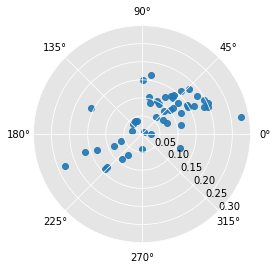

In [16]:
r4.plot()

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x7ffa87a9aeb8>)

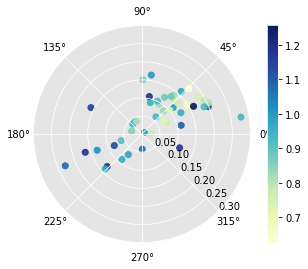

In [17]:
r4.plot(Y[:,0]) # condition on starting relative income

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x7ffa87379358>)

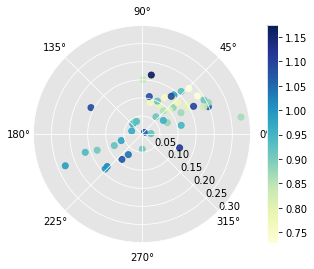

In [18]:
r4.plot(attribute=r4.lag[:,0]) # condition on the spatial lag of starting relative income

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ffa87c302b0>)

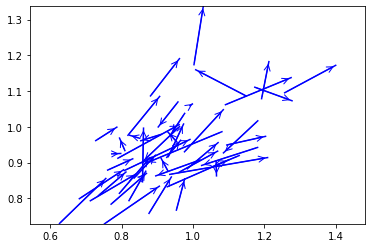

In [19]:
r4.plot_vectors() # lisa vectors

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ffa87c726a0>)

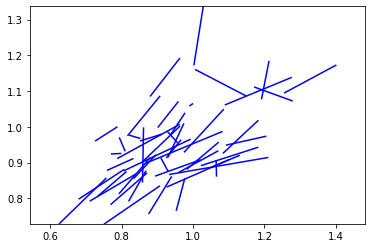

In [20]:
r4.plot_vectors(arrows=False)

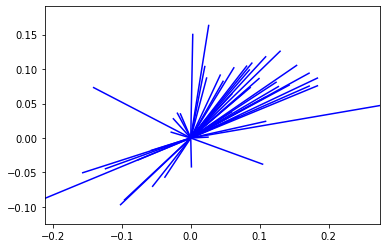

In [21]:
r4.plot_origin() # origin standardized



## Inference

The Rose class contains methods to carry out inference on the circular distribution of the LISA vectors. The  approach is based on a two-sided alternative where the null is that the distribution of the vectors across the segments reflects independence in the movements of the focal unit and its spatial lag. Inference is based on random spatial permutations under the null.

In [22]:
r4.cuts

array([0.        , 1.57079633, 3.14159265, 4.71238898, 6.28318531])

In [23]:
r4.counts

array([32,  5,  9,  2])

In [0]:
np.random.seed(1234)
r4.permute(permutations=999)

In [25]:
r4.p

array([0.028, 0.   , 0.002, 0.004])

<div class="alert alert-success" style="font-size:120%">
<b>Exercise</b>: <br>
Carry out a directional analysis of the LISA vectors using $k=8$
    What additional insights over the $k=4$ case do you find?
</div>

In [0]:
# %load solutions/410_1.py

## Readings
- [Rey, Anselin, Murray (2011) Visualizing regional income distribution dynamics. Letters in Spatial and Resource Sciences, 4: 81-90](https://link.springer.com/article/10.1007/s12076-010-0048-2)
- [Breau, Shin, Burkhart (2018) Pulling apart: new perspectives on the spatial dimensions of neighborhood income disparities in Canadian Cities. Journal of Geographical Systems, 20: 1-25.](https://link.springer.com/article/10.1007%2Fs10109-017-0255-0)


---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-
sa/4.0/"><img alt="Creative Commons License" style="border-width:0"
src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span
xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Directional Analysis of Dynamic LISAs</span> by <a xmlns:cc="http://creativecommons.org/ns#"
href="http://sergerey.org" property="cc:attributionName"
rel="cc:attributionURL">Serge Rey</a> is licensed under a <a
rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative
Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

[Wei Kang](https://spatial.ucr.edu/peopleKang.html) contributed to this notebook.